<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Izhikevich_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 3500x2500 with 0 Axes>

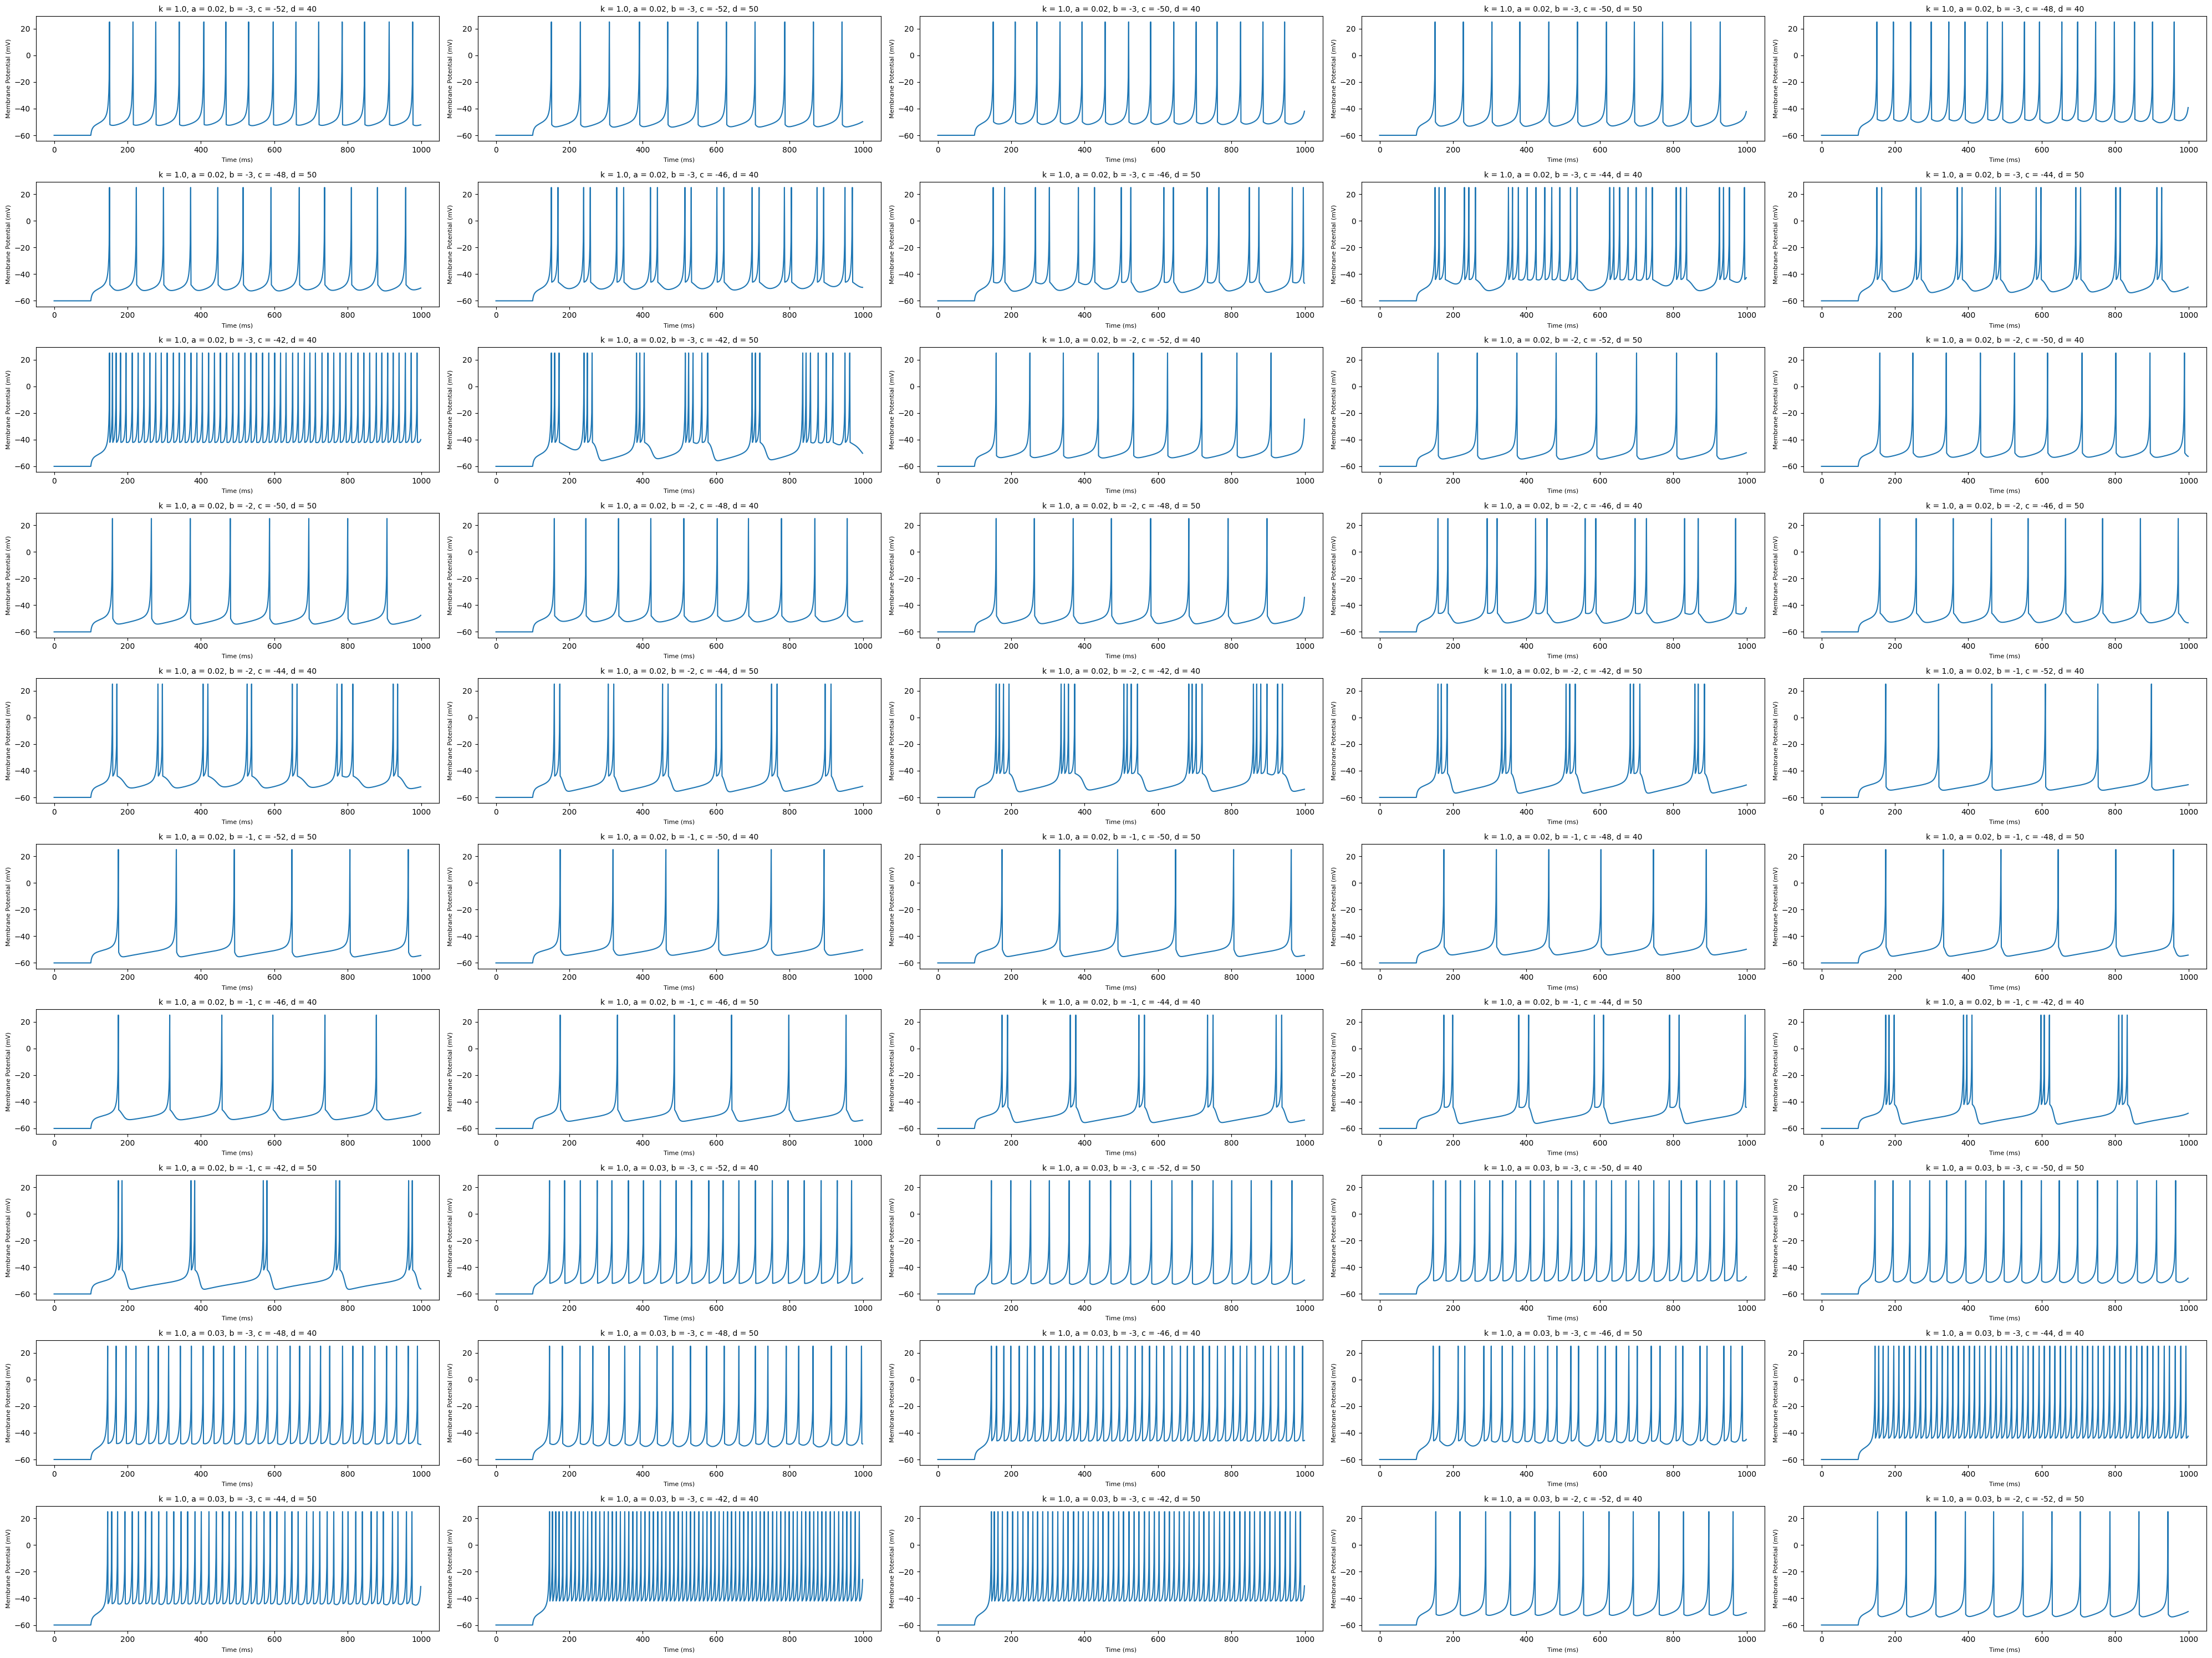

In [60]:
# 시뮬레이션 함수
def simulate_izhikevich(C, vr, vt, k, a, b, c, d, vpeak, T=1000, tau=1, I_amp=100):
    n = round(T / tau)
    v = vr * np.ones(n)
    u = np.zeros(n)
    I = np.concatenate((np.zeros(int(0.1 * n)), I_amp * np.ones(int(0.9 * n))))

    for i in range(n - 1):
        v[i + 1] = v[i] + tau * (k * (v[i] - vr) * (v[i] - vt) - u[i] + I[i]) / C
        u[i + 1] = u[i] + tau * a * (b * (v[i] - vr) - u[i])

        if v[i + 1] >= vpeak:
            v[i] = vpeak
            v[i + 1] = c
            u[i + 1] += d

    return v

# 넓은 범위의 `c`와 `d` 값을 설정하여 탐색
c_range = np.arange(-60, -40, 2)  # c 값을 -60에서 -40까지 2씩 증가
d_range = np.arange(10, 60, 10)   # d 값을 10에서 60까지 10씩 증가

plt.figure(figsize=(35, 25))
plot_num = 1

# 시뮬레이션 함수 및 결과 시각화 함수는 이전과 동일

# `c`와 `d` 값은 기록된 조합 사용
c_values = [-52, -50, -48, -46, -44, -42]
d_values = [40, 50]

# 탐색할 `k`, `a`, `b` 값 범위
k_values = [1.0, 1.2, 1.5, 1.8]
a_values = [0.02, 0.03, 0.04]
b_values = [-3, -2, -1]

plt.figure(figsize=(40, 30))
plot_num = 1

# `k`, `a`, `b` 값 조합 탐색
for k in k_values:
    for a in a_values:
        for b in b_values:
            for c in c_values:
                for d in d_values:
                    if plot_num > 50:
                        break
                    v_cs = simulate_izhikevich(50, -60, -40, k, a, b, c, d, 25)
                    time = np.arange(0, len(v_cs))

                    plt.subplot(10, 5, plot_num)
                    plt.plot(time, v_cs)
                    plt.title(f'k = {k}, a = {a}, b = {b}, c = {c}, d = {d}', fontsize=10)
                    plt.xlabel('Time (ms)', fontsize=8)
                    plt.ylabel('Membrane Potential (mV)', fontsize=8)
                    plot_num += 1

plt.tight_layout()
plt.show()
